In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
#load data set
df=pd.read_csv('cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            548 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         521 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave_points_mean     569 non-null    float64
 10  symmetry_mean           504 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
 12  radius_SE               569 non-null    float64
 13  texture_SE              548 non-null    float64
 14  perimeter_SE            569 non-null    fl

In [45]:
# check missing values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean              21
perimeter_mean             0
area_mean                  0
smoothness_mean           48
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean             65
fractal_dimension_mean     0
radius_SE                  0
texture_SE                21
perimeter_SE               0
area_SE                    0
smoothness_SE             48
compactness_SE             0
concavity_SE               0
concave_points_SE          0
symmetry_SE               65
fractal_dimension_SE       0
radius_max                 0
texture_max               21
perimeter_max              0
area_max                   0
smoothness_max            48
compactness_max            0
concavity_max              0
concave_points_max         0
symmetry_max              65
fractal_dimension_max      0
dtype: int64

In [46]:
#check duplicates
df.duplicated().sum()

5

In [47]:
#drop_duplicate
df.drop_duplicates(inplace= True)

In [48]:
df.duplicated().sum()

0

In [49]:
# fillna with mean value of each column
null_col=['texture_mean','smoothness_mean','symmetry_mean','texture_SE','smoothness_SE','symmetry_SE','texture_max','smoothness_max','symmetry_max']
for col in null_col:
    mean=df[col].mean()
    df[col]=df[col].fillna(mean)

In [50]:
df.isna().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_SE                 0
texture_SE                0
perimeter_SE              0
area_SE                   0
smoothness_SE             0
compactness_SE            0
concavity_SE              0
concave_points_SE         0
symmetry_SE               0
fractal_dimension_SE      0
radius_max                0
texture_max               0
perimeter_max             0
area_max                  0
smoothness_max            0
compactness_max           0
concavity_max             0
concave_points_max        0
symmetry_max              0
fractal_dimension_max     0
dtype: int64

In [51]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [70]:
#pd.plotting.scatter_matrix(df, figsize=(10,12));

In [53]:
#let check the distribution of diagosis(M, B)
df_m=df.loc[df['diagnosis']=='M']
df_m.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,19.275801,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,...,25.38,25.643941,184.60,2019.0,0.162200,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,...,24.99,23.410000,158.80,1956.0,0.123800,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,...,23.57,25.530000,152.50,1709.0,0.144400,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.380000,77.58,386.1,0.096097,0.28390,0.2414,0.10520,...,14.91,26.500000,98.87,567.7,0.132107,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,...,22.54,16.670000,152.20,1575.0,0.137400,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
df_b=df.loc[df['diagnosis']=='B']
df_b.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
40,89511502,B,12.670,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,...,13.71,21.10,88.70,574.4,0.13840,0.12120,0.10200,0.05602,0.2688,0.06888


In [37]:
df_m['area_mean'].describe()

count     210.000000
mean      976.582857
std       365.494289
min       361.600000
25%       706.850000
50%       932.000000
75%      1200.750000
max      2501.000000
Name: area_mean, dtype: float64

In [57]:
print("The average area of malignant tumor is {0:.4f}, while the average area for benign tumor is {1:.4f}".format(df_m['area_mean'].mean(), df_b['area_mean'].mean()))

The average area of malignant tumor is 976.5829, while the average area for benign tumor is 462.7124


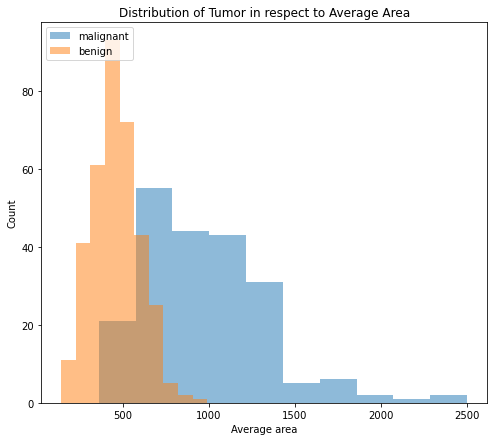

In [59]:
fig, ax=plt.subplots(figsize=(8,7))
ax.hist(df_m['area_mean'], alpha=0.5, label='malignant')
ax.hist(df_b['area_mean'], alpha=0.5, label='benign')
ax.set_xlabel('Average area')
ax.set_ylabel('Count')
ax.set_title('Distribution of Tumor in respect to Average Area')
ax.legend(loc='upper left');

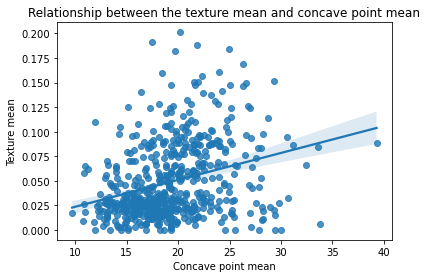

In [81]:
sns.regplot(data=df,x='texture_mean',y='concave_points_mean')
plt.title('Relationship between the texture mean and concave point mean')
plt.xlabel('Concave point mean')
plt.ylabel('Texture mean');

 From the plot above the slightly positive correlated with correlation value of about 0.3

In [78]:
mean_df=df[['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
          'concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean']]
mean_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,19.275801,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.380000,77.58,386.1,0.096097,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809,0.05883


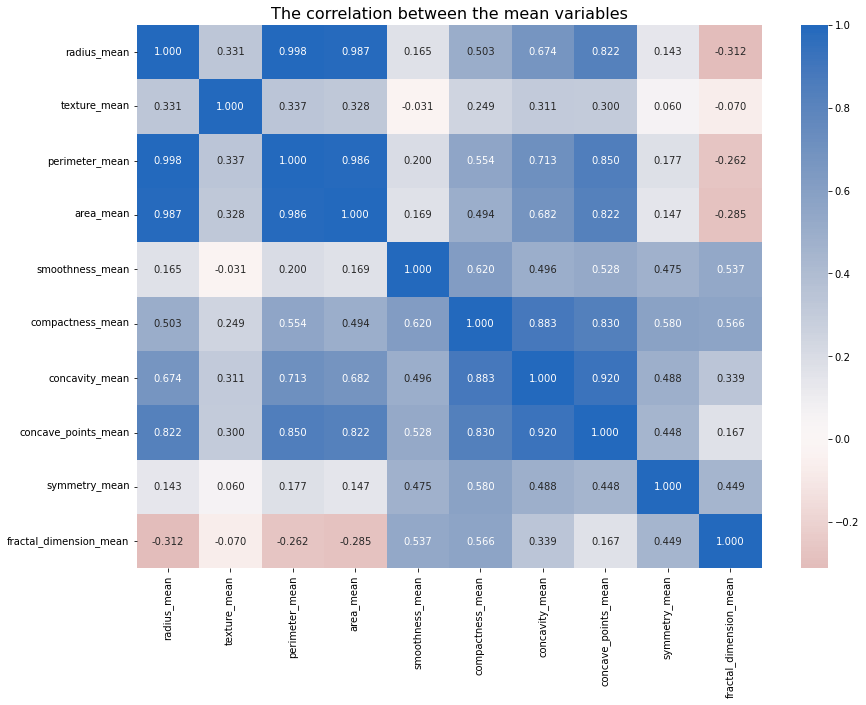

In [79]:
#Depit the relationship between the mean variable
cor_df=mean_df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
          'concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean']]
#cor_df.head()
plt.figure(figsize=(14,10))
sns.heatmap(cor_df.corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0)
plt.title('The correlation between the mean variables', fontsize=16);